In [1]:
from IPython.display import display
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
import re
from utils import plot
from utils.utils import visualize
import feature_engg

In [2]:
data = pd.read_csv('./csv_data/data.csv', low_memory=False, dtype=str)
feature_df = pd.read_csv('./csv_data/excel_doc.csv', low_memory=False, dtype=str)
fips_all_codes_df = pd.read_csv('./csv_data/fips_all_codes.csv', low_memory=False, dtype=str)

### Field values for indentification on maps

In [3]:
feature_df.head(n=20)

,field,col_col,year_of_data,variable_name,characteristics,source,date_on
0,f00001,00001-00001,NaN,Blank,NaN,NaN,NaN
1,f00002,00002-00006,NaN,Header - FIPS St & Cty Code,NaN,Derived From GSA,NaN
2,f00003,00007-00011,NaN,Entity of File,Equals 'AHRF ',NaN,NaN
3,f00004,00012-00031,NaN,Secondary Entity Of File,Mod FIPS St & Cty Code,Derived From GSA,NaN
4,f00005,00032-00035,NaN,Date of File,Equals '2017',NaN,07/17
5,f00006,00036-00040,NaN,Date of Creation,Equals '17212',NaN,07/17
6,f00007,00041-00045,NaN,File Length,Equals '31446',NaN,07/17
7,f00008,00046-00064,NaN,State Name,NaN,NaN,NaN
8,f12424,00065-00066,NaN,State Name Abbreviation,NaN,U.S. Post Office,02/96
9,f00010,00067-00091,NaN,County Name,NaN,"DDH,9-33",NaN


state code = f00011 | county code = f00012

### Binary feature Identification

- filter out all features that have 1 and 3 or more feature values in them.
- visualize them on a map.


In [32]:
nunique_columns_df = pd.DataFrame(data.nunique()).reset_index()
nunique_columns_df.columns = ['column', 'nunique']
binary_feature_list = nunique_columns_df[(nunique_columns_df['nunique'] < 3) 
                                         & (nunique_columns_df['nunique'] > 1)]['column'].tolist()

50

In [6]:
feature_df[feature_df['field'].isin(binary_feature_list)]

,field,col_col,year_of_data,variable_name,characteristics,source,date_on
22,f1419515,00223-00230,2015.0,CBSA County Status,Central or Outlying,Census Pop Division,07/17
30,f1248115,00349-00349,2015.0,Farming-Dependent Typology Code,NaN,ERS Dept of Agriculture,07/16
31,f1248215,00350-00350,2015.0,Mining-Dependent Typology Code,NaN,ERS Dept of Agriculture,07/16
32,f1248315,00351-00351,2015.0,Manufacturing-Dep Typology Code,NaN,ERS Dept of Agriculture,07/16
33,f1248415,00352-00352,2015.0,Fed/St Govt-Depdnt Typolgy Code,Federal/State Government,ERS Dept of Agriculture,07/16
34,f1546915,00353-00353,2015.0,Recreation Typolpgy Code,NaN,ERS Dept of Agriculture,07/16
35,f1248615,00354-00354,2015.0,Nonspecializd-Dep Typology Code,NaN,ERS Dept of Agriculture,07/16
36,f1397515,00355-00355,2015.0,Low Education Typology Code,NaN,ERS Dept of Agriculture,07/16
37,f1397615,00356-00356,2015.0,Low Employment Typology Code,NaN,ERS Dept of Agriculture,07/16
38,f1533414,00357-00357,2014.0,High Poverty Typology Code,NaN,ERS Dept of Agriculture,08/14


I am passing the value from the feature feild in the data.

we can look up for the feature characteristics either by opening the file ./csv_data/excel_doc.csv in excel or by browsing the through the data frame feature_df defined above.

I am also not including the names of the counties or states on the maps. The code is built to include them by changing the parameter state_names = True. County names can also be included similarly with minor changes in code.

One example with names is shown below

### US map county level feature details : 
Note: I am skipping some states like Alasaka and some islands

### feature: f1419515 | CBSA County Status

example with state names

<IPython.core.display.Javascript object>


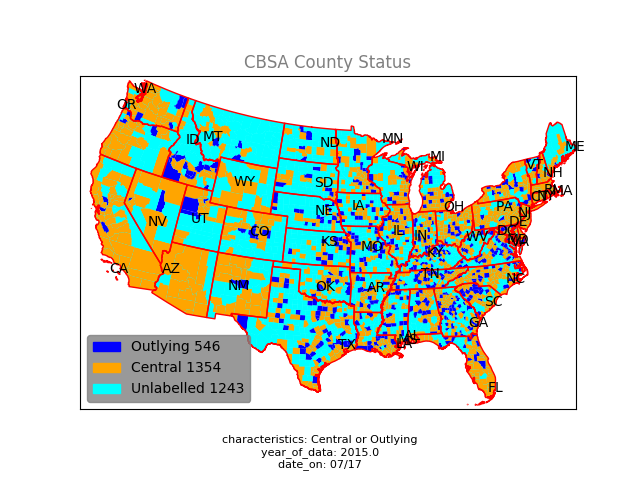

In [18]:
% matplotlib notebook
feature = 'f1419515'
# visualize(feature, data, feature_df, state='all')
plt_title = feature_df[feature_df.field == feature]['variable_name'].tolist()[0]
plt_desc = ''
for key, value in feature_df[feature_df.field == feature].to_dict().items():
    if key in ['year_of_data', 'date_on', 'characteristics']:
        plt_desc += key + ": " + str(list(value.values())[0]) + "\n"

feature_values_dict = feature_engg.extract_feature_data(data=data, feature=feature, state='all')

# plot map
US_map = plot.USMaps(state_borders=True, county_borders=False, state_names=True)
US_map.colour_code_usa_country(data=feature_values_dict, title=plt_title, desc=plt_desc)

### feature: f1419515 | Low education topology code

<IPython.core.display.Javascript object>


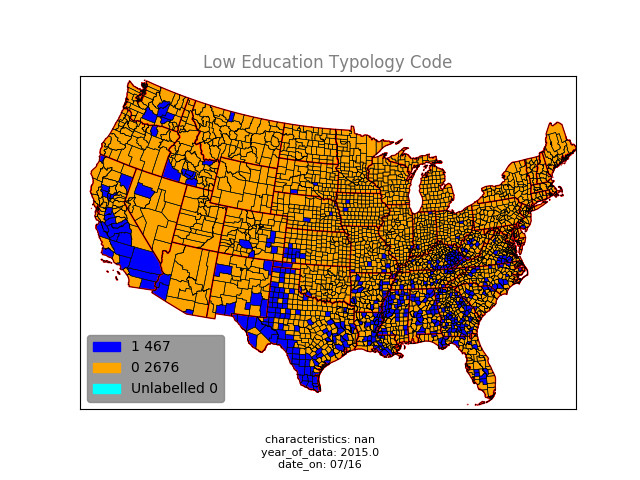

In [10]:
% matplotlib notebook
feature = 'f1397515'
visualize(feature, data, feature_df, state='all')

### US state map with county level details

### feature: f1419515 | CBSA County Status | state: Texas

<IPython.core.display.Javascript object>


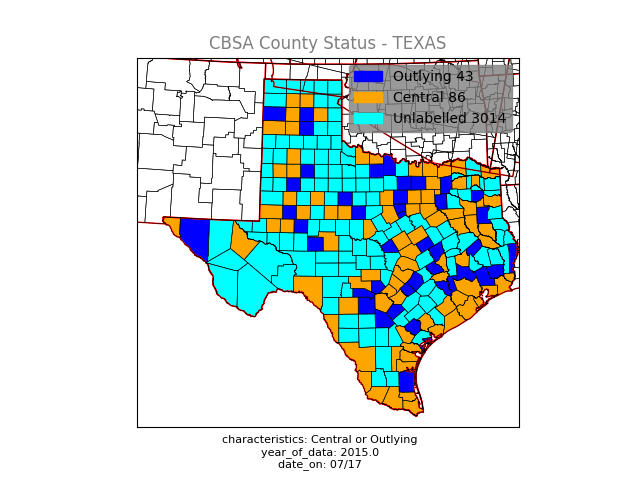

In [9]:
% matplotlib notebook

feature = 'f1419515'
visualize(feature, data, feature_df, state='texas')

### feature: f1397515 | Low education topology code | state: CA

<IPython.core.display.Javascript object>


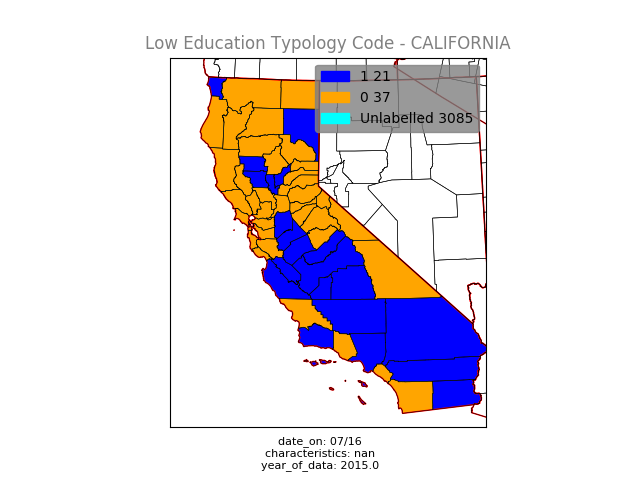

In [7]:
% matplotlib notebook
feature = 'f1397515'
visualize(feature, data, feature_df, state='ca')

### census region code

<IPython.core.display.Javascript object>


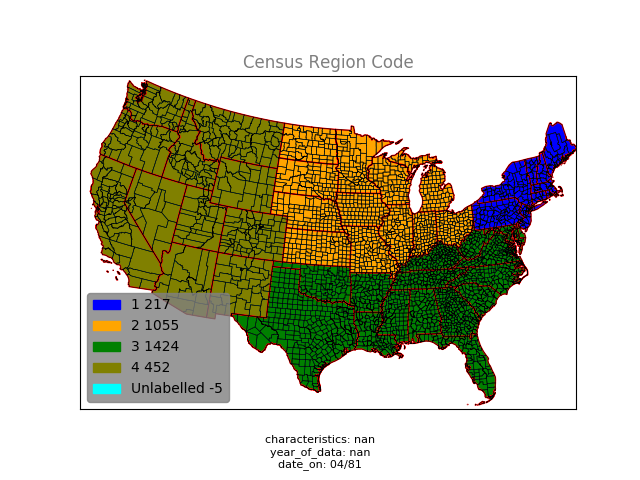

In [46]:
visualize('f04439', data, feature_df,)

### Visualizations for a few Health Care code

<IPython.core.display.Javascript object>


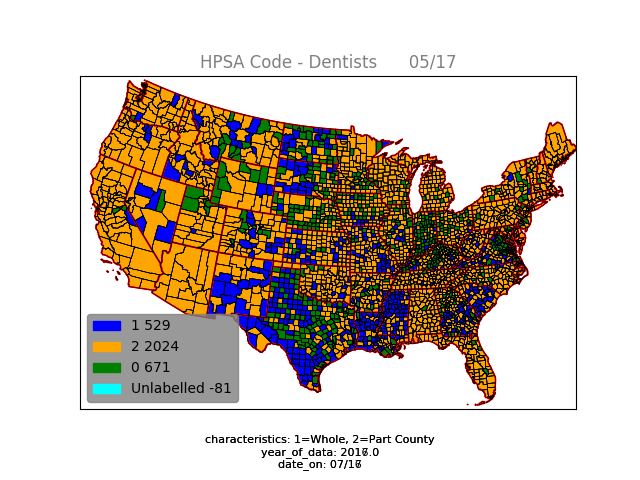

In [77]:
% matplotlib notebook
visualize('f0978716', data, feature_df,)

<IPython.core.display.Javascript object>


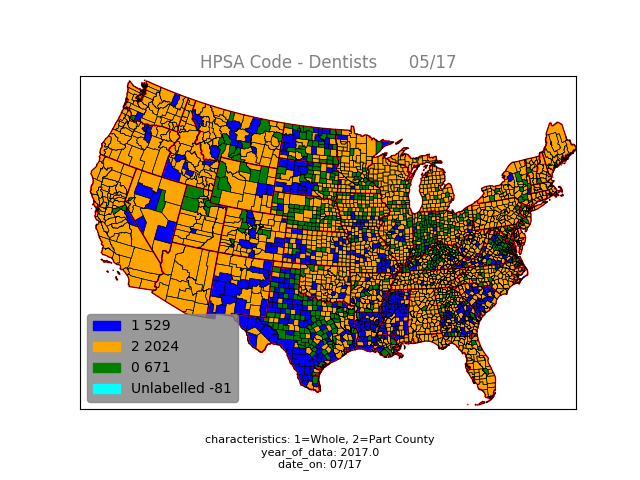

In [79]:
% matplotlib notebook
visualize('f0979217', data, feature_df)

<IPython.core.display.Javascript object>


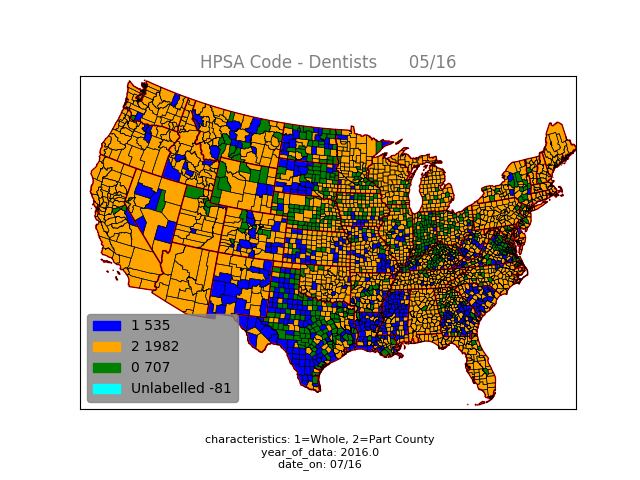

In [80]:
% matplotlib notebook
visualize('f0979216', data, feature_df)

Most of the other healthcare features are numerical and to plot them I need to add another plot to class usmap to handle numercial features with fading of colour to show the numbers varying between counties which I skipped in this exercise